In [1]:
import Pkg

In [2]:
Pkg.activate("..")

  Activating project at `~/Documents/Dev/BFM`


In [3]:
import BFM

In [4]:
Pkg.activate(".")

  Activating project at `~/Documents/Dev/BFM/notebooks`


In [5]:
using JLD2

In [6]:
cd("../data/ogs.pelagic")

In [7]:
er = reshape(load("data.jld2", "er"), 43, 10, 10, :);
bathy = reshape(load("data.jld2", "mbathy"), 10, 10);
state = reshape(load("data.jld2", "d3state"), 43, 10, 10, :);

In [8]:
BFM.initialize(10, 10, 43)

    NO_BOXES_TOT        4300
    NO_BOXES_X          10
    NO_BOXES_Y          10
    NO_BOXES_Z          43
    NO_BOXES_XY         100
    allocating NO_BOXES_XY
    NO_STATES      219300
    NO_D3_BOX_STATES          51
    -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
     BIOGEOCHEMICAL FLUX MODEL (BFM) ACTIVITY LOG  
    -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
                   BFM System Team                 
     
     
    Step 1 - INITIALIZATION (init_bfm)
     
     
        EXPERIMENT NAME : BFM_standalone_pelagic
     
        EXPERIMENT SETUP :
        Using only Pelagic component (bio_setup=1)
            pelagic variables =          51
            pelagic transported variables =
            pelagic diagnostic variables =         103
        Dimensional informations:
            NO_BOXES_X  =          10
            NO_BOXES_Y  =          10
            NO_BOXES_Z  =          43
            NO_BOXES    =        4300
            NO_BOXES_XY =         100
     

In [9]:
BFM.setbathimetry(bathy)

In [10]:
BFM.setenvironmentalfactors(er)

In [11]:
function rungekuttastep!(state, Δt)
    k1 = BFM.run(state)
    k2 = BFM.run(state + (Δt / 2) * k1)
    k3 = BFM.run(state + (Δt / 2) * k2)
    k4 = BFM.run(state + k3)
    state .+= (Δt / 6) * (k1 + 2k2 + 2k3 + k4)
end

rungekuttastep! (generic function with 1 method)

In [12]:
using Plots

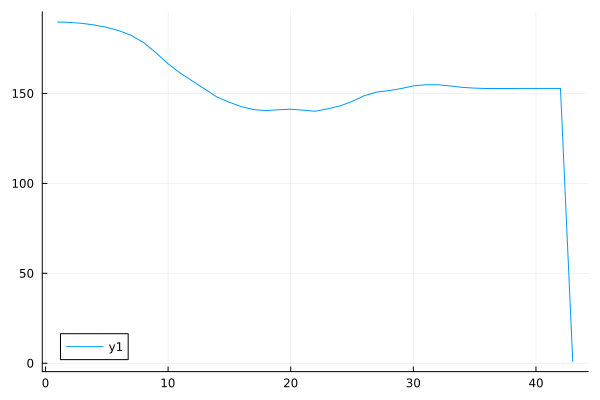

In [13]:
plot(state[:, 5, 5, 1])

In [16]:
using Profile

In [17]:
newstate = copy(state)
@profile for _ = 1:100
    rungekuttastep!(newstate, 1000.0)
end

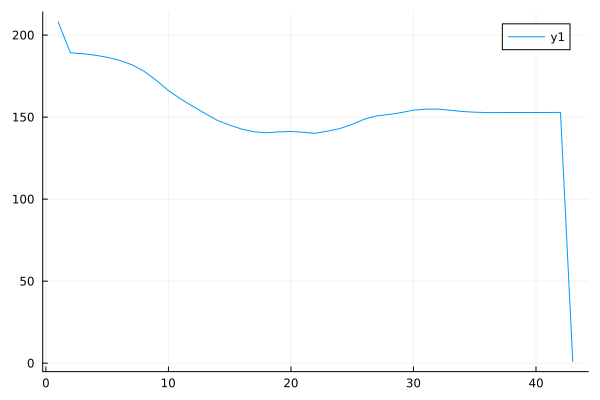

In [15]:
plot(newstate[:, 5, 5, 1])

In [19]:
Profile.print(format=:flat)

 Count  Overhead File                    Line Function
 =====  ======== ====                    ==== ========
   840         0 In[11]                     2 rungekuttastep!(state::Array{Fl...
   950         0 In[11]                     3 rungekuttastep!(state::Array{Fl...
  1142         0 In[11]                     4 rungekuttastep!(state::Array{Fl...
   880         0 In[11]                     5 rungekuttastep!(state::Array{Fl...
   251         0 In[11]                     6 rungekuttastep!(state::Array{Fl...
  4063         0 In[17]                     3 macro expansion
   157         0 @Base/abstractarray.jl   793 similar
   157         0 @Base/abstractarray.jl   794 similar
     2         0 @Base/abstractarray.jl   840 similar
     2         0 @Base/abstractarray.jl   841 similar
    27         0 @Base/array.jl           925 getindex
   387         0 @Base/array.jl           968 setindex!
   157         0 @Base/array.jl           378 similar
   261         0 @Base/arraymath.jl       